In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import h5py
import healpy as hp
basedir=('/Users/ewallwic/Dropbox_MIT/Science/simulations-hera-eox/'
         'data/simulations/')

In [164]:
def loadinfo(simdir):
    roi=fits.open(glob.glob(basedir+simdir+'/*')[0]+'/roi/roiinfo.fits')
    sky=h5py.File(glob.glob(basedir+simdir+'/*')[0]+'/skymodel/skymodel.hdf5','r')
    return roi,sky
def plotsky(simdir,fchan):
    roit,skyt=loadinfo(simdir)
    indices=list(roit[3].data.astype(int))
    print roit.info()
    fluxes=skyt['spectral_info']['flux_density'][indices]
    ra=skyt['object']['RA'][indices]
    ra[ra>=180]-=360.
    dec=skyt['object']['Dec'][indices]
    pb=roit[4].data[:,fchan]
    freq=roit[2].data[fchan]
    plt.scatter(ra,dec,c=np.log10(pb),lw=0,s=30,vmin=-3,vmax=0)
    plt.colorbar()
    title=('Primary Beam f=%.2fMHz'%(freq/1e6),'max=%.2f'%(pb.max()))
    plt.gcf().set_size_inches(18,10)
    plt.title(title)
    plt.show()
    #sortedarray=np.sort(np.vstack([ra,dec,pb*fluxes]).T.view('f8','f8','f8'),order='f3',axis=0).view(np.float64)
    #ra=sortedarray[:,0]
    #dec=sortedarray[:,1]
    #pbflux=sortedarray[:,2]
    plt.scatter(ra,dec,c=np.log10(fluxes*pb),lw=0,s=30,vmin=-3,vmax=.5)
    plt.colorbar()
    title=('Apparent Sky f=%.2fMHz'%(freq/1e6))
    plt.gcf().set_size_inches(18,10)
    plt.title(title)
    plt.show()

Filename: /Users/ewallwic/Dropbox_MIT/Science/simulations-hera-eox/data/simulations/hera_19_highband_z08_lst0/2017-10-11-04-50-05/roi/roiinfo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  ANTENNA ELEMENT ORIENTATION    1 ImageHDU         8   (2, 1)   int64   
  2  FREQ          1 ImageHDU         7   (80,)   float64   
  3  IND_0         1 ImageHDU         7   (393455,)   int64   
  4  PB_0          1 ImageHDU         8   (80, 393455)   float32   
None


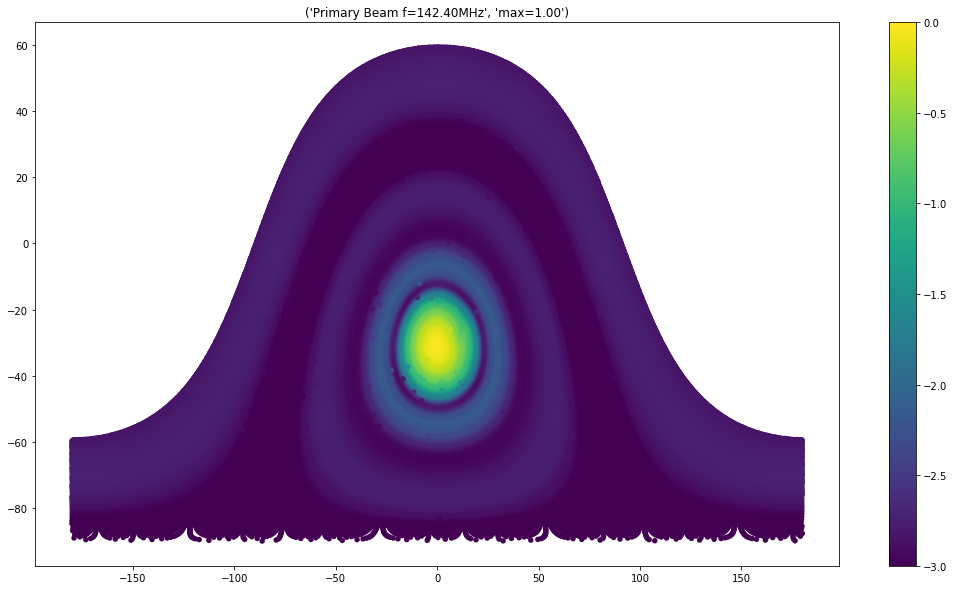

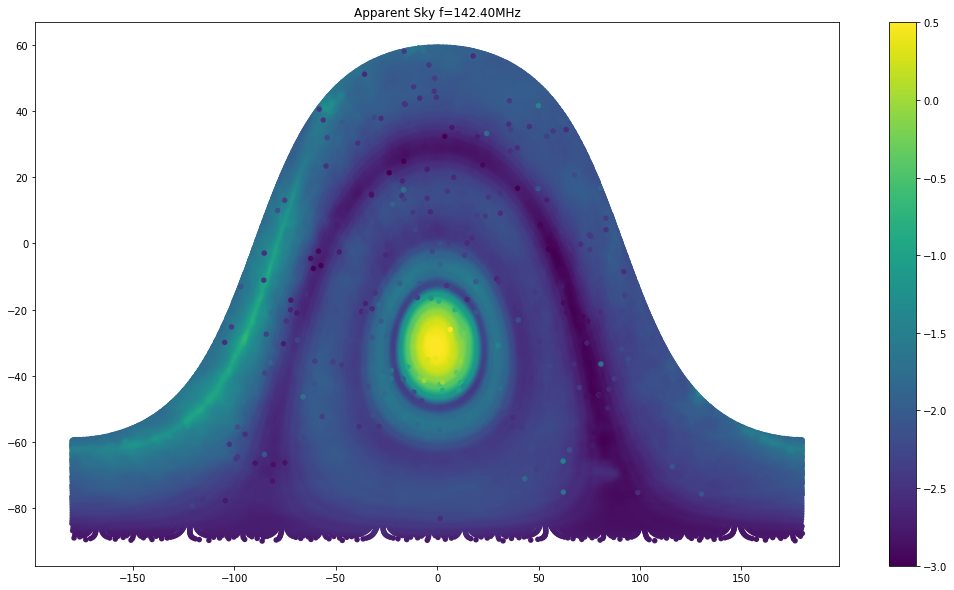

In [165]:
plotsky('hera_19_highband_z08_lst0',1)

Filename: /Users/ewallwic/Dropbox_MIT/Science/simulations-hera-eox/data/simulations/hera_19_vivaldi_z08_lst0/2017-10-11-04-46-25/roi/roiinfo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  ANTENNA ELEMENT ORIENTATION    1 ImageHDU         8   (2, 1)   int64   
  2  FREQ          1 ImageHDU         7   (80,)   float64   
  3  IND_0         1 ImageHDU         7   (393455,)   int64   
  4  PB_0          1 ImageHDU         8   (80, 393455)   float32   
None


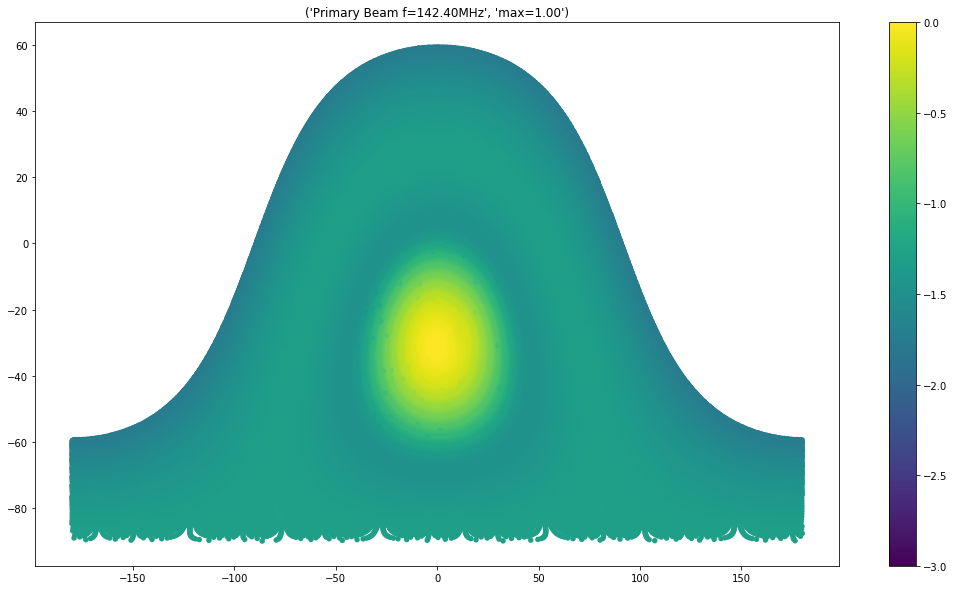

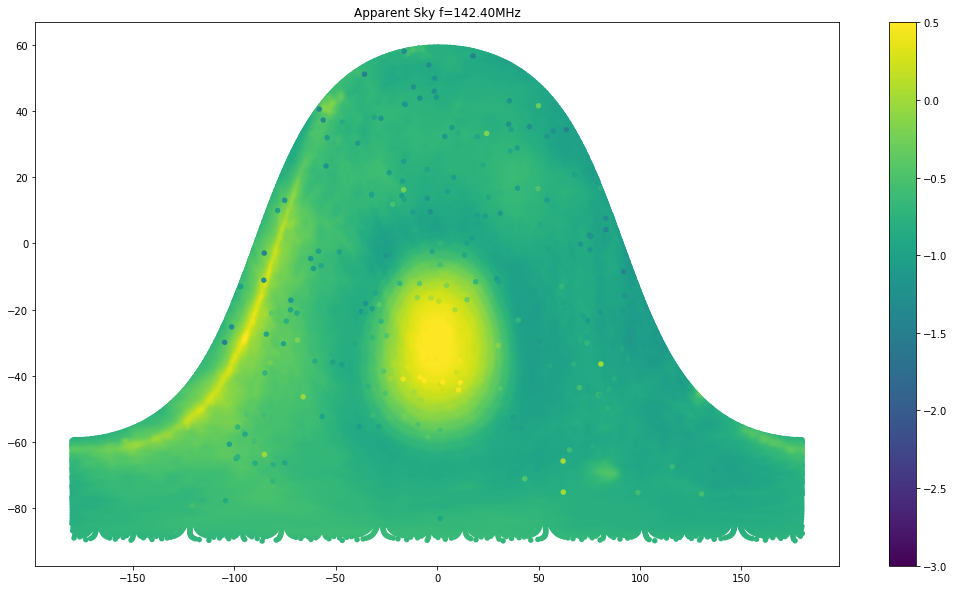

In [166]:
plotsky('hera_19_vivaldi_z08_lst0',1)